In [1]:
from ast import literal_eval

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("data/processed/gurgaon_10k.csv")
print(df.shape)
df.head()

(10162, 28)


,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,BEDROOM_NUM,AMENITIES,PROP_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LONGITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS
0,70597758,h70597758,gurgaon,31900000.0,20202.0,1579.0,9.0,"['1 metro station', '1 shopping', '2 connectiv...",3 bhk flat in sector 113 gurgaon,"there is a 3 bhk apartment in sector 113, gurg...",residential apartment,not available,not available,5,25.0,['n'],3.0,NaN,la vida by tata housing,NaN,1.0,28.532594,77.020297,3.0,sector 113 gurgaon,la vida by tata housing,la vida by tata housing,NaN
1,70436188,h70436188,gurgaon,18500000.0,9135.0,2025.0,12.0,"['1 metro station', '1 shopping', '1 connectiv...",3 bhk flat in sector 77 gurgaon,let your dream of owning a flat come true with...,residential apartment,not available,not available,6,24.0,['n'],3.0,NaN,emaar palm heights,NaN,1.0,28.385577,76.975992,3.0,sector 77 gurgaon,emaar palm heights,emaar palm heights,NaN
2,70217014,l70217014,gurgaon,120600000.0,42736.0,2822.0,9.0,"['1 metro station', '1 shopping', '1 connectiv...",5 bhk flat in sector 53 gurgaon,tulip monsella offers 5 bhk flats in sector 53...,residential apartment,not available,not available,5,20.0,['n'],5.0,NaN,tulip monsella,NaN,1.0,28.435057,77.101367,5.0,sector 53 gurgaon,tulip monsella,tulip monsella,NaN
3,70217012,x70217012,gurgaon,95300000.0,42736.0,2229.0,9.0,"['1 metro station', '1 shopping', '1 connectiv...",4 bhk flat in sector 53 gurgaon,tulip monsella offers 4 bhk flats in sector 53...,residential apartment,not available,not available,5,20.0,['n'],4.0,NaN,tulip monsella,NaN,1.0,28.435057,77.101367,4.0,sector 53 gurgaon,tulip monsella,tulip monsella,NaN
4,70217010,a70217010,gurgaon,72000000.0,43834.0,1642.0,9.0,"['1 metro station', '1 shopping', '1 connectiv...",3 bhk flat in sector 53 gurgaon,tulip monsella offers 3 bhk apartments in sect...,residential apartment,not available,not available,5,20.0,['n'],3.0,NaN,tulip monsella,NaN,1.0,28.435057,77.101367,3.0,sector 53 gurgaon,tulip monsella,tulip monsella,NaN


In [4]:
df.columns

Index(['SPID', 'PROP_ID', 'CITY', 'PRICE', 'PRICE_SQFT', 'AREA',
       'TOTAL_LANDMARK_COUNT', 'FORMATTED_LANDMARK_DETAILS', 'PROP_HEADING',
       'DESCRIPTION', 'PROPERTY_TYPE', 'FURNISH', 'FACING', 'AGE',
       'TOTAL_FLOOR', 'FEATURES', 'BEDROOM_NUM', 'AMENITIES', 'PROP_NAME',
       'BALCONY_NUM', 'FLOOR_NUM', 'LATITUDE', 'LONGITUDE', 'BHK_BED',
       'LOCALITY_NAME', 'BUILDING_NAME', 'SOCIETY_NAME', 'ADDRESS'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10162 entries, 0 to 10161
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SPID                        10162 non-null  int64  
 1   PROP_ID                     10162 non-null  object 
 2   CITY                        10162 non-null  object 
 3   PRICE                       10162 non-null  float64
 4   PRICE_SQFT                  10162 non-null  float64
 5   AREA                        10162 non-null  float64
 6   TOTAL_LANDMARK_COUNT        10051 non-null  float64
 7   FORMATTED_LANDMARK_DETAILS  10162 non-null  object 
 8   PROP_HEADING                10162 non-null  object 
 9   DESCRIPTION                 10162 non-null  object 
 10  PROPERTY_TYPE               10162 non-null  object 
 11  FURNISH                     10162 non-null  object 
 12  FACING                      10162 non-null  object 
 13  AGE                         101

In [6]:
df.isnull().sum()

SPID                             0
PROP_ID                          0
CITY                             0
PRICE                            0
PRICE_SQFT                       0
AREA                             0
TOTAL_LANDMARK_COUNT           111
FORMATTED_LANDMARK_DETAILS       0
PROP_HEADING                     0
DESCRIPTION                      0
PROPERTY_TYPE                    0
FURNISH                          0
FACING                           0
AGE                              0
TOTAL_FLOOR                     51
FEATURES                         0
BEDROOM_NUM                    998
AMENITIES                      275
PROP_NAME                     1836
BALCONY_NUM                   1147
FLOOR_NUM                     1730
LATITUDE                         0
LONGITUDE                        0
BHK_BED                        998
LOCALITY_NAME                    0
BUILDING_NAME                 1836
SOCIETY_NAME                  1836
ADDRESS                       5201
dtype: int64

## FORMATTED_LANDMARK_DETAILS

In [7]:
df["FORMATTED_LANDMARK_DETAILS"].head(5).values

array(["['1 metro station', '1 shopping', '2 connectivities', '2 educations', '1 hospital', '1 airport', '1 railway station']",
       "['1 metro station', '1 shopping', '1 connectivity', '2 educations', '1 hospital', '1 airport', '1 railway station', '1 hotels', '1 amusement park', '1 golf course', '1 stadium']",
       "['1 metro station', '1 shopping', '1 connectivity', '2 educations', '1 hospital', '1 club', '2 hotelss']",
       "['1 metro station', '1 shopping', '1 connectivity', '2 educations', '1 hospital', '1 club', '2 hotelss']",
       "['1 metro station', '1 shopping', '1 connectivity', '2 educations', '1 hospital', '1 club', '2 hotelss']"],
      dtype=object)

In [8]:
df["FORMATTED_LANDMARK_DETAILS"] = df["FORMATTED_LANDMARK_DETAILS"].apply(literal_eval)

In [9]:
unique_landmarks = (
    df["FORMATTED_LANDMARK_DETAILS"]
    .explode()
    .str.split(" ", n=1)
    .str.get(-1)
    .str.replace("ss", "s")
    .str.removesuffix("s")
    .unique()
    .tolist()
)
print(len(unique_landmarks))
unique_landmarks

28


['metro station',
 'shopping',
 'connectivitie',
 'education',
 'hospital',
 'airport',
 'railway station',
 'connectivity',
 'hotel',
 'amusement park',
 'golf course',
 'stadium',
 'club',
 'office complex',
 'atm',
 'pharmacy',
 'miscellaneou',
 'library',
 'religious place',
 'office complexe',
 'attraction',
 'parking',
 'swimming pool',
 'bank',
 'park',
 nan,
 'bus stop',
 'bus depot']

In [10]:
landmark_groups = {
    "TRANSPORATION": ["station", "bus", "airport"],
    "ACCOMODATION": ["hotel", "office", "atm", "bank"],
    "LEISURE": ["shop", "mall", "park", "stadium", "club", "pool", "attraction", "golf"],
    "EDUCATION": ["education", "library"],
    "HEALTH": ["hospital", "pharmacy"],
    "OTHER": [
        "religious",
        "connect",
        "miscellaneou",
        "parking",  # This value is being over-shadowed by `park` in LEISURE.
    ],
}

In [11]:
def handle_landmarks(x: list[str], key: str) -> list[str]:
    global curr_idx  # type: ignore
    col_values: list[int] = []

    for i in x:
        for j in landmark_groups[key]:
            if j in i and isinstance(i, str):
                value = i.split(" ")[0]
                col_values.append(int(value))
    else:
        col_values.append(0)

    df.loc[curr_idx, key] = sum(col_values)  # type: ignore
    curr_idx += 1  # type: ignore
    return x

In [12]:
for col_name in landmark_groups.keys():
    curr_idx = 0
    df["FORMATTED_LANDMARK_DETAILS"].apply(lambda x: handle_landmarks(x, col_name))

In [13]:
df["FORMATTED_LANDMARK_DETAILS"].sample(8, random_state=10).values

array([list(['3 metro stations', '2 religious places', '5 atms', '5 hospitals', '1 attraction', '2 pharmacys', '2 office complexes', '2 miscellaneouss']),
       list(['1 metro station', '1 shopping', '1 connectivity', '2 educations', '1 airport', '1 office complex', '2 hotelss', '1 amusement park', '1 golf course', '1 miscellaneous']),
       list(['1 metro station', '1 shopping', '1 connectivity', '2 educations', '1 hospital', '1 airport', '2 clubs', '1 office complex', '1 hotels', '1 amusement park', '2 miscellaneouss']),
       list(['2 shoppings', '2 educations', '1 religious place', '1 hospital', '4 bankss', '1 pharmacy', '1 park', '3 miscellaneouss']),
       list(['1 shopping', '2 connectivities', '2 educations', '1 hospital', '1 airport', '1 office complex', '1 amusement park', '1 miscellaneous']),
       list(['1 shopping', '2 connectivities', '3 educations', '1 hospital', '1 airport', '1 railway station', '1 hotels', '1 stadium']),
       list(['5 metro stations', '3 religio

In [14]:
df[["TOTAL_LANDMARK_COUNT", *landmark_groups.keys()]].sample(8, random_state=10)

,TOTAL_LANDMARK_COUNT,TRANSPORATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER
10066,42.0,3.0,7.0,1.0,0.0,7.0,4.0
832,12.0,2.0,3.0,3.0,2.0,0.0,2.0
10123,14.0,2.0,2.0,4.0,2.0,1.0,3.0
5183,15.0,0.0,4.0,3.0,2.0,2.0,4.0
4465,10.0,1.0,1.0,2.0,2.0,1.0,3.0
7405,11.0,2.0,1.0,2.0,3.0,1.0,2.0
7238,44.0,5.0,8.0,0.0,0.0,13.0,3.0
4080,15.0,0.0,5.0,2.0,1.0,2.0,5.0


## AMENITIES

In [15]:
df["AMENITIES"] = df["AMENITIES"].apply(
    lambda x: [] if isinstance(x, float) else list(map(int, literal_eval(x)))
)
df["AMENITIES"].sample(5)

1064    [17, 2, 20, 21, 44, 23, 45, 24, 46, 47, 29, 1,...
8426    [17, 20, 21, 44, 23, 19, 1, 6, 30, 42, 33, 12,...
571                                       [5, 23, 24, 26]
475     [20, 21, 44, 23, 29, 1, 6, 9, 30, 33, 12, 26, ...
1334    [17, 8, 20, 10, 44, 45, 46, 39, 40, 30, 41, 42...
Name: AMENITIES, dtype: object

In [16]:
unique_amenities = df["AMENITIES"].explode().unique().tolist()
print(len(unique_amenities))
print(sorted(unique_amenities))

36
[nan, 1, 2, 3, 5, 6, 8, 9, 10, 12, 17, 19, 20, 21, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 39, 40, 41, 42, 43, 44, 45, 46, 47, 101, 102, 103]


In [17]:
amenity_df = pd.read_csv("data/facets/AMENITIES.csv")
print(amenity_df.shape)
amenity_df.head()

(33, 4)


,id,category,type,label
0,25,Other Features,FEATURES_RESIDENTIAL,Waste Disposal
1,26,Other Features,FEATURES_RESIDENTIAL,Rain Water Harvesting
2,28,Other Features,FEATURES_COMMERCIAL,Bank Attached Property
3,2,Property Feature,FEATURES_COMMERCIAL,Power Back-up
4,5,Property Feature,FEATURES_RESIDENTIAL,Feng Shui / Vaastu Compliant


In [18]:
amenity_df["id"].sort_values().values

array([ 1,  2,  3,  5,  6,  8,  9, 10, 11, 12, 13, 15, 16, 17, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 32, 33, 34, 35, 36, 37, 38, 39])

In [19]:
amenity_df["label"].values

array(['Waste Disposal', 'Rain Water Harvesting',
       'Bank Attached Property', 'Power Back-up',
       'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace',
       'Centrally Air Conditioned', 'Security / Fire Alarm',
       'Intercom Facility', 'Water Storage', 'Piped-gas',
       'Water purifier', 'Near Bank', 'Swimming Pool',
       'Club house / Community Center', 'Park', 'Security Personnel',
       'Fitness Centre / GYM', 'Visitor Parking', 'Lift(s)',
       'Maintenance Staff', 'Shopping Centre',
       'WheelChair Accessibilitiy', 'DG Availability',
       'CCTV Surveillance', 'Grade A Building', 'Grocery Shop', 'ATM',
       'Cafeteria / Food Court', 'Bar / Lounge', 'Conference room',
       'Service / Goods Lift', 'Access to High Speed Internet'],
      dtype=object)

In [20]:
amenity_values = {
    "Waste Disposal": 5,
    "Rain Water Harvesting": 7,
    "Bank Attached Property": 3,
    "Power Back-up": 9,
    "Feng Shui / Vaastu Compliant": 6,
    "Private Garden / Terrace": 8,
    "Centrally Air Conditioned": 9,
    "Security / Fire Alarm": 9,
    "Intercom Facility": 7,
    "Water Storage": 6,
    "Piped-gas": 4,
    "Water purifier": 6,
    "Near Bank": 5,
    "Swimming Pool": 8,
    "Club house / Community Center": 7,
    "Park": 8,
    "Security Personnel": 9,
    "Fitness Centre / GYM": 8,
    "Visitor Parking": 6,
    "Lift(s)": 8,
    "Maintenance Staff": 5,
    "Shopping Centre": 7,
    "WheelChair Accessibilitiy": 4,
    "DG Availability": 7,
    "CCTV Surveillance": 9,
    "Grade A Building": 7,
    "Grocery Shop": 5,
    "ATM": 6,
    "Cafeteria / Food Court": 6,
    "Bar / Lounge": 7,
    "Conference room": 6,
    "Service / Goods Lift": 6,
    "Access to High Speed Internet": 8,
}

In [21]:
amenity_df["values"] = amenity_df["label"].map(amenity_values, "ignore")

In [22]:
amenity_value_lookup: dict[str, int] = (
    amenity_df[["id", "values"]].set_index("id").to_dict()["values"]
)

In [23]:
def handle_amenities(x: list[str]) -> float | int:
    if isinstance(x, float):
        return x

    total_sum = sum(amenity_value_lookup.get(i, 0) for i in x)
    return total_sum

In [24]:
df["AMENITIES_SCORE"] = df["AMENITIES"].apply(handle_amenities)
df["AMENITIES_SCORE"].describe()

count    10162.000000
mean        77.642393
std         43.841759
min          0.000000
25%         43.000000
50%         76.000000
75%        116.000000
max        150.000000
Name: AMENITIES_SCORE, dtype: float64

In [25]:
df["AMENITIES_SCORE"].min(), df["AMENITIES_SCORE"].max()  # Suprising result (0, 150)

(0, 150)

<Axes: >

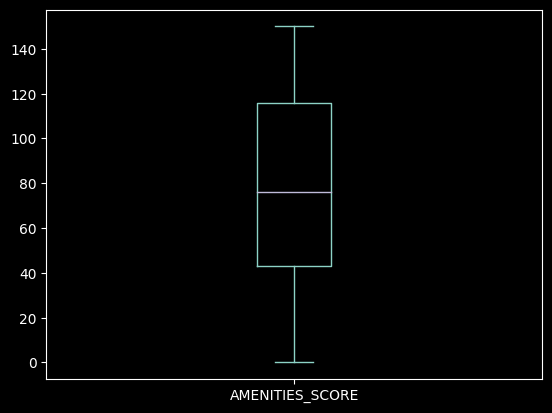

In [26]:
df["AMENITIES_SCORE"].plot.box()

<Axes: xlabel='AMENITIES_SCORE', ylabel='Count'>

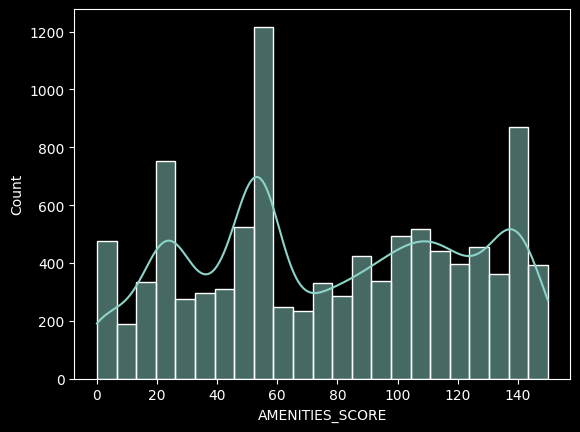

In [27]:
sns.histplot(df["AMENITIES_SCORE"], kde=True)

## FEATURES

In [28]:
def eval_features(x):
    if isinstance(x, float):
        return []

    rv = []
    for i in literal_eval(x):
        if i.isnumeric():
            rv.append(int(i))
        else:
            rv.append(i)
    return rv

In [29]:
df["FEATURES"] = df["FEATURES"].apply(eval_features)
df["FEATURES"].sample(5)

2307    [23, 12, 24, 46, 25, 26, 28, 29, 19, 1, 3, 5, ...
241                          [23, 1, 24, 26, 5, 6, 19, 9]
2115                                          [23, 5, 19]
1415                       [23, 24, 5, 17, 6, 19, 20, 21]
7017    [44, 23, 24, 47, 25, 26, 29, 30, 31, 32, 33, 1...
Name: FEATURES, dtype: object

In [30]:
unique_features = df["FEATURES"].explode().unique()
print(len(unique_features))
unique_features

35


array(['n', 23, 24, 5, 17, 6, 19, 20, 21, 33, 45, 12, 25, 47, 26, 28, 1,
       3, 9, 40, 41, 42, 32, 29, 44, 46, 39, 8, 30, 10, 43, 'f', 31, 2,
       'p'], dtype=object)

In [31]:
features_df = pd.read_csv("data/facets/FEATURES.csv")
print(features_df.shape)
features_df.head()

(14, 2)


,id,label
0,4,Parking
1,6,Park
2,2,Power Backup
3,21,Lift
4,12,Gymnasium


In [32]:
features_df["label"].values

array(['Parking', 'Park', 'Power Backup', 'Lift', 'Gymnasium',
       'Club house', 'Waste disposal', 'Swimming Pool',
       'Security Personnel', 'Gas Pipeline', 'Near bank',
       'DG Availability', 'Wheelchair Accessibility', 'ATM'], dtype=object)

In [33]:
features_values = {
    "Parking": 5,
    "Park": 7,
    "Power Backup": 9,
    "Lift": 8,
    "Gymnasium": 8,
    "Club house": 7,
    "Waste disposal": 5,
    "Swimming Pool": 8,
    "Security Personnel": 9,
    "Gas Pipeline": 6,
    "Near bank": 5,
    "DG Availability": 7,
    "Wheelchair Accessibility": 4,
    "ATM": 6,
}

In [34]:
features_df["values"] = features_df["label"].map(features_values, "ignore")
features_df

,id,label,values
0,4,Parking,5
1,6,Park,7
2,2,Power Backup,9
3,21,Lift,8
4,12,Gymnasium,8
5,3,Club house,7
6,25,Waste disposal,5
7,1,Swimming Pool,8
8,9,Security Personnel,9
9,29,Gas Pipeline,6


In [35]:
features_value_lookup: dict[str, int] = (
    features_df[["id", "values"]].set_index("id").to_dict()["values"]
)
print(features_value_lookup)

{4: 5, 6: 7, 2: 9, 21: 8, 12: 8, 3: 7, 25: 5, 1: 8, 9: 9, 29: 6, 39: 5, 35: 7, 34: 4, 11: 6}


In [36]:
def handle_features(x: list[str]) -> float | int:
    if isinstance(x, (float, int)):
        return x

    total_sum = sum(features_value_lookup.get(i, 0) for i in x)
    return total_sum

In [37]:
df["FEATURES_SCORE"] = df["FEATURES"].apply(handle_features)
df["FEATURES_SCORE"].describe()

count    10162.000000
mean        35.643279
std         24.204278
min          0.000000
25%         15.000000
50%         40.000000
75%         58.000000
max         72.000000
Name: FEATURES_SCORE, dtype: float64

In [38]:
df["FEATURES_SCORE"].min(), df["FEATURES_SCORE"].max()

(0, 72)

## AGE

In [39]:
def eval_numeric_values(x: str | float):
    if isinstance(x, float):
        return x

    x = x.replace(".", "")
    if x.isnumeric():
        return int(x)
    return x

In [40]:
print(df["AGE"].nunique())
df["AGE"].unique()

6


array([5, 6, 1, 3, 0, 2])

In [41]:
df["AGE"].value_counts()

AGE
1    3757
6    2243
2    1551
5    1013
0     990
3     608
Name: count, dtype: int64

In [42]:
temp = pd.read_csv("data/facets/AGE.csv")
value_lookup = temp.set_index("id").to_dict()["label"]
df["AGE"] = df["AGE"].map(value_lookup)

print("null values:", df["AGE"].isnull().sum())
df["AGE"].value_counts()

null values: 0


AGE
1-5 Year Old Property     3757
0-1 Year Old Property     2243
5-10 Year Old Property    1551
Under Construction        1013
Undefined                  990
10+ Year Old Property      608
Name: count, dtype: int64

## TOTAL_FLOOR

In [43]:
df["TOTAL_FLOOR"] = df["TOTAL_FLOOR"].apply(eval_numeric_values)

In [44]:
print(df["TOTAL_FLOOR"].nunique())
df["TOTAL_FLOOR"].unique()

49


array([25., 24., 20., 22., 29., 14.,  4.,  2., 32., 39.,  0., 42.,  3.,
       26., 36., 12., 28., 13.,  5.,  1., nan, 18., 17., 30.,  8., 35.,
       40., 33., 15., 38., 34., 10., 43., 21., 19., 16., 11., 47., 27.,
        9., 44.,  6., 51., 23.,  7., 31., 41., 45., 50., 48.])

In [45]:
df["TOTAL_FLOOR"].value_counts(dropna=False)[:10]

TOTAL_FLOOR
4.0     2831
3.0      743
14.0     731
2.0      574
18.0     425
19.0     413
24.0     290
20.0     255
32.0     249
26.0     247
17.0     237
30.0     232
12.0     221
29.0     217
13.0     213
15.0     187
22.0     159
1.0      155
25.0     155
40.0     155
21.0     147
16.0     133
10.0      88
Name: count, dtype: int64

## FLOOR_NUM

In [46]:
df["FLOOR_NUM"] = df["FLOOR_NUM"].apply(eval_numeric_values)

In [47]:
print(df["FLOOR_NUM"].nunique())
df["FLOOR_NUM"].unique()

47


array([10, 60, 20, 30, 40, nan, 1, 4, 'g', 2, 12, 17, 15, 3, 6, 28, 7, 16,
       9, 14, 18, 8, 26, 24, 23, 19, 5, 22, 13, 11, 21, 35, 32, 0, 'l',
       27, 31, 25, 38, 29, 39, 'b', 33, 37, 34, 36, 41, 43], dtype=object)

In [48]:
df["FLOOR_NUM"].value_counts(dropna=False)[:10]

FLOOR_NUM
NaN    1730
2      1056
1      1021
3       674
4       641
10      513
7       488
6       466
8       463
5       454
Name: count, dtype: int64

<Axes: xlabel='FLOOR_NUM', ylabel='PRICE'>

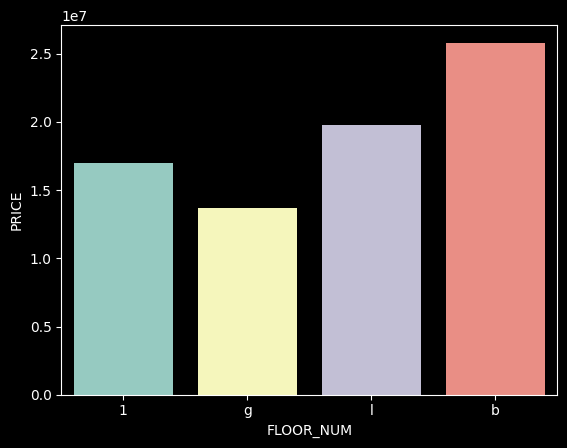

In [49]:
sns.barplot(
    df.query("FLOOR_NUM==['g','b','l','m',1]"),
    x="FLOOR_NUM",
    y="PRICE",
    estimator="median",
    errorbar=("ci", 0),
)

## Categorize `FLOOR_NUM, TOTAL_FLOOR`

I am not going to decode the `FLOOR_NUM, TOTAL_FLOOR` fetures because they are just same value after encodeing.

**See:**

- [FLOOR_NUM.csv](../data/facets/FLOOR_NUM.csv)
- [TOTAL_FLOOR.csv](../data/facets/TOTAL_FLOOR.csv)

In [50]:
temp_cols = ["FLOOR_NUM", "TOTAL_FLOOR"]

for col in temp_cols:
    df[col] = df[col].apply(
        lambda x: x
        if pd.isna(obj=x)
        else "low rise"
        if x in ["g", "l", "b", "m"]
        else "low rise"
        if 1 <= x <= 3
        else "mid rise"
        if 4 <= x <= 10
        else "high rise"
    )

    print(df[col].value_counts(dropna=False))

FLOOR_NUM
mid rise     3411
low rise     3147
high rise    1874
NaN          1730
Name: count, dtype: int64
TOTAL_FLOOR
high rise    5493
mid rise     3146
low rise     1472
NaN            51
Name: count, dtype: int64


# General Step - End

In [51]:
df.columns

Index(['SPID', 'PROP_ID', 'CITY', 'PRICE', 'PRICE_SQFT', 'AREA',
       'TOTAL_LANDMARK_COUNT', 'FORMATTED_LANDMARK_DETAILS', 'PROP_HEADING',
       'DESCRIPTION', 'PROPERTY_TYPE', 'FURNISH', 'FACING', 'AGE',
       'TOTAL_FLOOR', 'FEATURES', 'BEDROOM_NUM', 'AMENITIES', 'PROP_NAME',
       'BALCONY_NUM', 'FLOOR_NUM', 'LATITUDE', 'LONGITUDE', 'BHK_BED',
       'LOCALITY_NAME', 'BUILDING_NAME', 'SOCIETY_NAME', 'ADDRESS',
       'TRANSPORATION', 'ACCOMODATION', 'LEISURE', 'EDUCATION', 'HEALTH',
       'OTHER', 'AMENITIES_SCORE', 'FEATURES_SCORE'],
      dtype='object')

In [52]:
df.isnull().sum()

SPID                             0
PROP_ID                          0
CITY                             0
PRICE                            0
PRICE_SQFT                       0
AREA                             0
TOTAL_LANDMARK_COUNT           111
FORMATTED_LANDMARK_DETAILS       0
PROP_HEADING                     0
DESCRIPTION                      0
PROPERTY_TYPE                    0
FURNISH                          0
FACING                           0
AGE                              0
TOTAL_FLOOR                     51
FEATURES                         0
BEDROOM_NUM                    998
AMENITIES                        0
PROP_NAME                     1836
BALCONY_NUM                   1147
FLOOR_NUM                     1730
LATITUDE                         0
LONGITUDE                        0
BHK_BED                        998
LOCALITY_NAME                    0
BUILDING_NAME                 1836
SOCIETY_NAME                  1836
ADDRESS                       5201
TRANSPORATION       

In [53]:
drop_cols = "FORMATTED_LANDMARK_DETAILS AMENITIES FEATURES".split()
df.drop(columns=drop_cols, inplace=True)
df.shape

(10162, 33)

In [54]:
df.sample(7)

,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LONGITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRANSPORATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE,FEATURES_SCORE
8728,70649116,e70649116,gurgaon,24800000.0,11100.0,2180.0,10.0,4 bhk flat in sector 102 gurgaon,this lovely 4 bhk apartment/flat in sector 102...,residential apartment,Unfurnished,North,5-10 Year Old Property,high rise,4.0,shapoorji pallonji joyville gurugram,4.0,high rise,28.479277,76.976095,4.0,sector 102 gurgaon,shapoorji pallonji joyville gurugram,shapoorji pallonji joyville gurugram,NaN,2.0,2.0,2.0,2.0,1.0,1.0,89,35
9328,69146474,k69146474,gurgaon,24900000.0,10440.0,2385.0,45.0,3 bhk independent builder floor in malibu town,"malibu town ( 265 sq yard, corner plot (most p...",independent/builder floor,Semifurnished,South-East,1-5 Year Old Property,mid rise,3.0,NaN,2.0,low rise,28.422656,77.045656,3.0,malibu town,NaN,NaN,rw47,0.0,3.0,2.0,0.0,20.0,1.0,124,53
3052,70445258,x70445258,gurgaon,120000.0,50.0,2400.0,43.0,3 bhk flat in dlf phase 3,available for rent ambience lagoon 3 bhk fully...,residential apartment,Furnished,North-East,10+ Year Old Property,mid rise,3.0,ambience lagoon,3.0,mid rise,28.503241,77.098734,3.0,dlf phase 3,ambience lagoon,ambience lagoon,NaN,4.0,8.0,0.0,0.0,16.0,1.0,90,58
6645,70734058,q70734058,gurgaon,27000000.0,11020.0,2450.0,14.0,flat in sector 104 gurgaon,winner of the residential property of the year...,residential apartment,Semifurnished,North-East,1-5 Year Old Property,high rise,NaN,puri emerald bay,NaN,low rise,28.478780,76.995990,NaN,sector 104 gurgaon,puri emerald bay,puri emerald bay,NaN,3.0,2.0,3.0,3.0,1.0,2.0,109,47
8080,69861714,e69861714,gurgaon,14500000.0,16111.0,900.0,45.0,residential land / plot in sector 57 gurgaon,prime location walking distance market school...,residential land,not available,East,Undefined,mid rise,NaN,NaN,NaN,NaN,28.423441,77.076593,NaN,sector 57 gurgaon,NaN,NaN,NaN,0.0,4.0,4.0,0.0,15.0,5.0,24,0
2492,69552206,z69552206,gurgaon,55000.0,48.0,1130.0,7.0,2 bhk flat in sector 60 gurgaon,ireo project is the best project one of them ....,residential apartment,Semifurnished,North,1-5 Year Old Property,high rise,2.0,ireo skyon,2.0,mid rise,28.399880,77.096540,2.0,sector 60 gurgaon,ireo skyon,ireo skyon,403,2.0,1.0,1.0,1.0,1.0,1.0,150,72
959,69883058,u69883058,gurgaon,24300000.0,9946.0,2443.0,11.0,4 bhk flat in sector 37d gurgaon,this beautiful 4 bhk flat in sector 37d gurgao...,residential apartment,Semifurnished,North-East,1-5 Year Old Property,high rise,4.0,bptp terra,3.0,low rise,28.455543,76.973390,4.0,sector 37d gurgaon,bptp terra,bptp terra,NaN,1.0,2.0,2.0,2.0,2.0,2.0,140,72


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10162 entries, 0 to 10161
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SPID                  10162 non-null  int64  
 1   PROP_ID               10162 non-null  object 
 2   CITY                  10162 non-null  object 
 3   PRICE                 10162 non-null  float64
 4   PRICE_SQFT            10162 non-null  float64
 5   AREA                  10162 non-null  float64
 6   TOTAL_LANDMARK_COUNT  10051 non-null  float64
 7   PROP_HEADING          10162 non-null  object 
 8   DESCRIPTION           10162 non-null  object 
 9   PROPERTY_TYPE         10162 non-null  object 
 10  FURNISH               10162 non-null  object 
 11  FACING                10162 non-null  object 
 12  AGE                   10162 non-null  object 
 13  TOTAL_FLOOR           10111 non-null  object 
 14  BEDROOM_NUM           9164 non-null   float64
 15  PROP_NAME          

## Export Dataset

In [56]:
df.to_csv("data/processed/gurgaon_10k.csv", index=False)